<a href="https://colab.research.google.com/github/mrunalini1806/python/blob/main/EDA_on_WineQuality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Wine Quality Dataset.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [7]:
df.shape

(4898, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [10]:
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [11]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [12]:
df.nunique()

,0
fixed acidity,68
volatile acidity,125
citric acid,87
residual sugar,310
chlorides,160
free sulfur dioxide,132
total sulfur dioxide,251
density,890
pH,103
sulphates,79


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


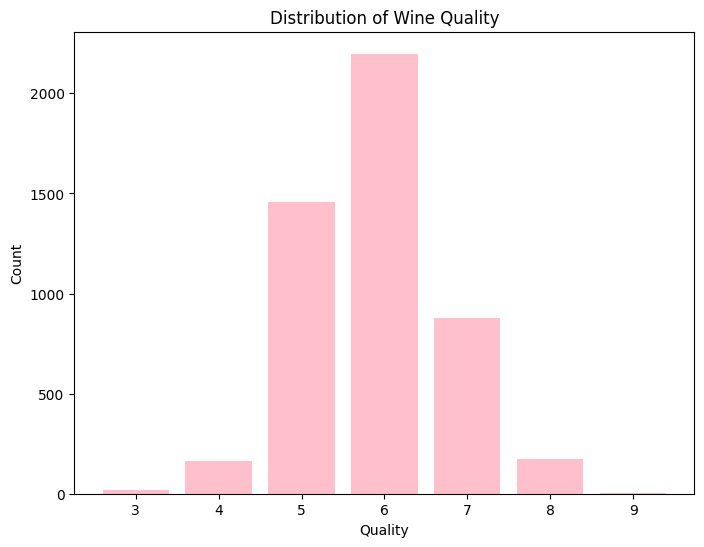

In [13]:
quality_counts = df['quality'].value_counts()
print(quality_counts)
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts,color='pink')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

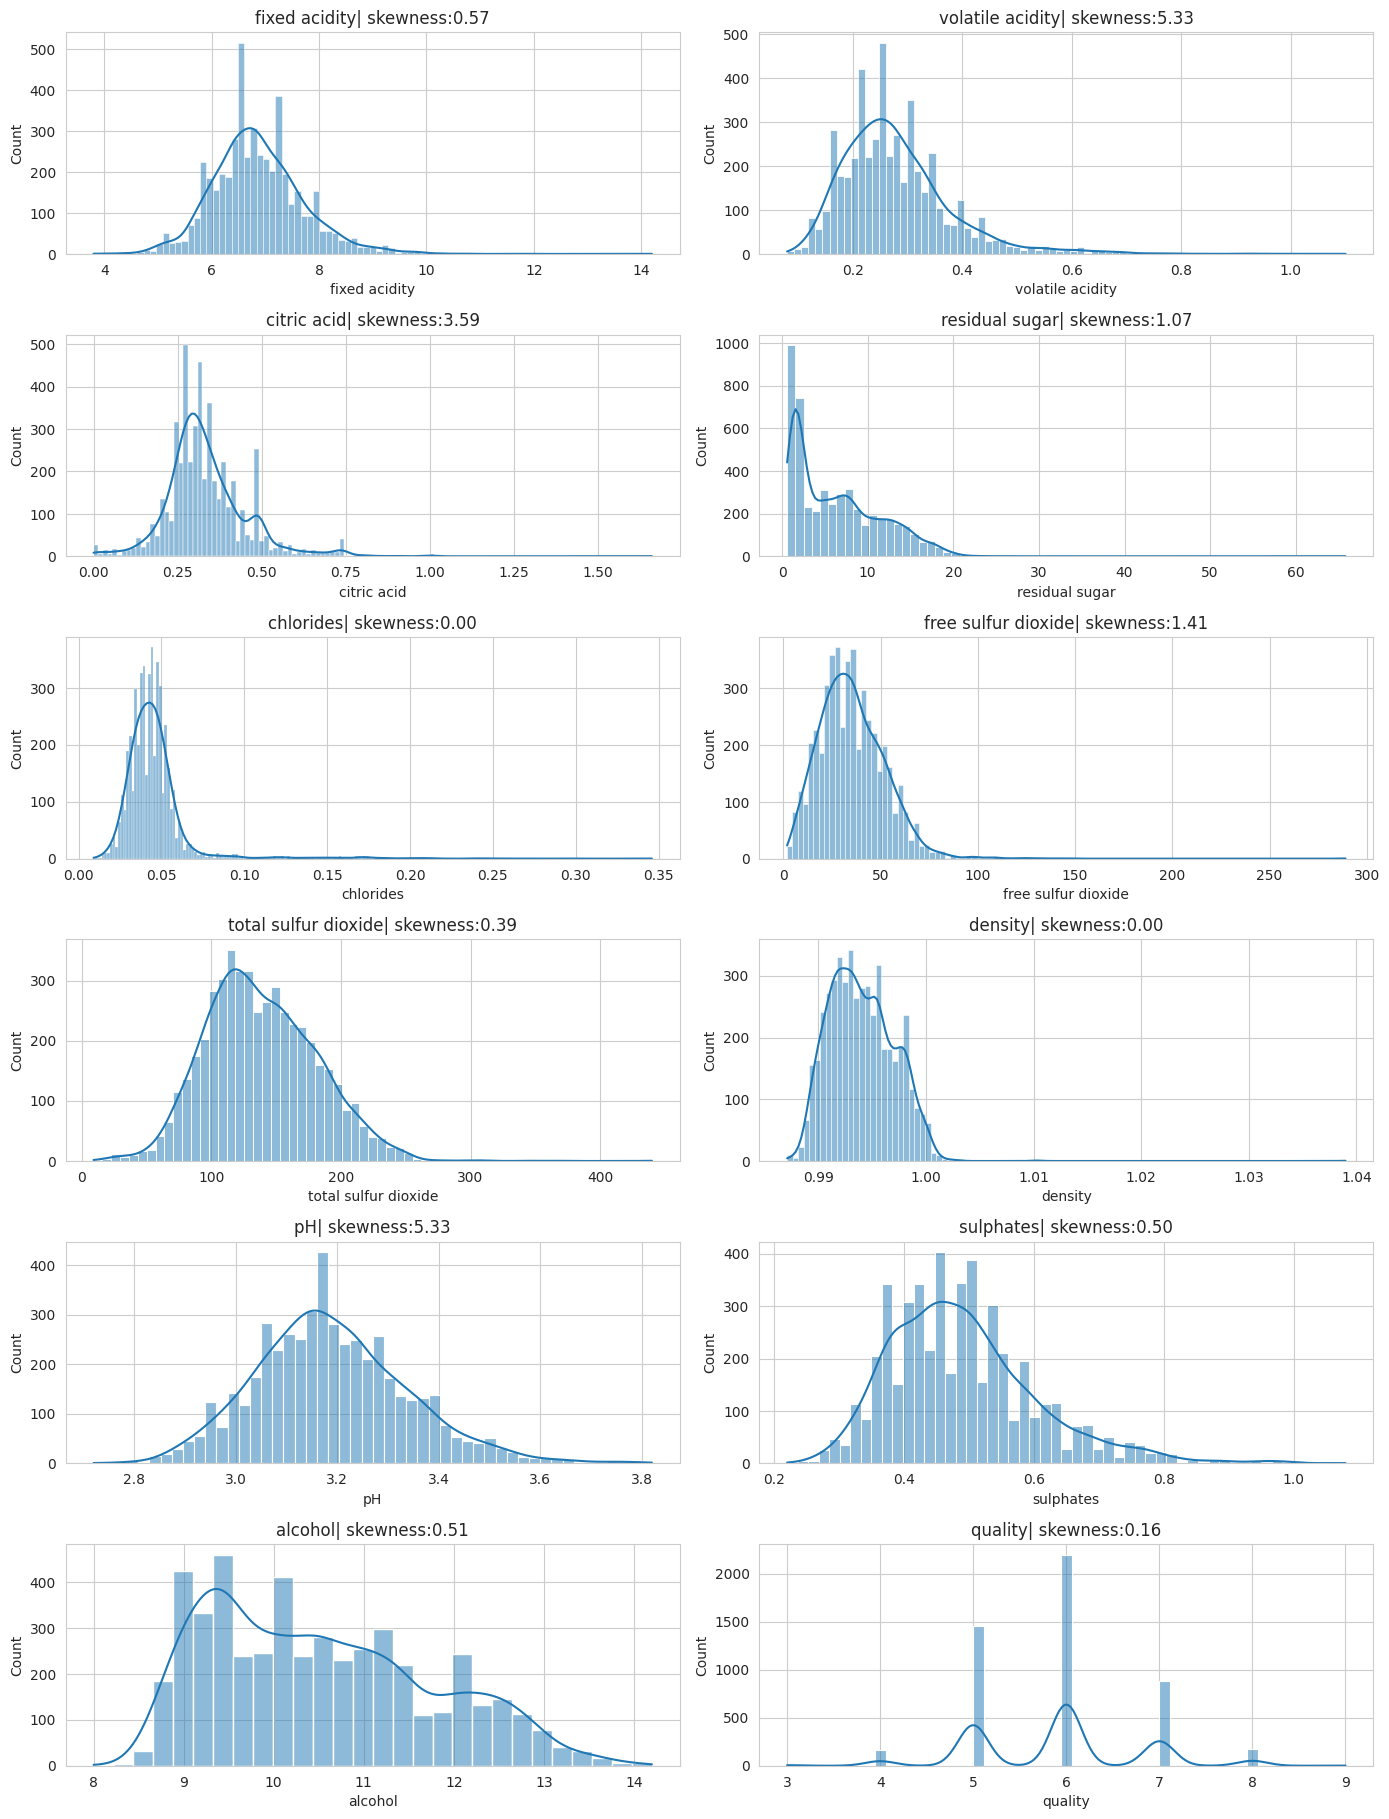

In [14]:
sns.set_style('whitegrid')
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(14,len(numerical_columns) *3))
for idx, feature in enumerate(numerical_columns,1):
  plt.subplot(len(numerical_columns),2, idx)
  sns.histplot(df[feature],kde=True)
  plt.title(f'{feature}| skewness:{round(df[feature]).skew():.2f}')
  plt.tight_layout()
plt.show()

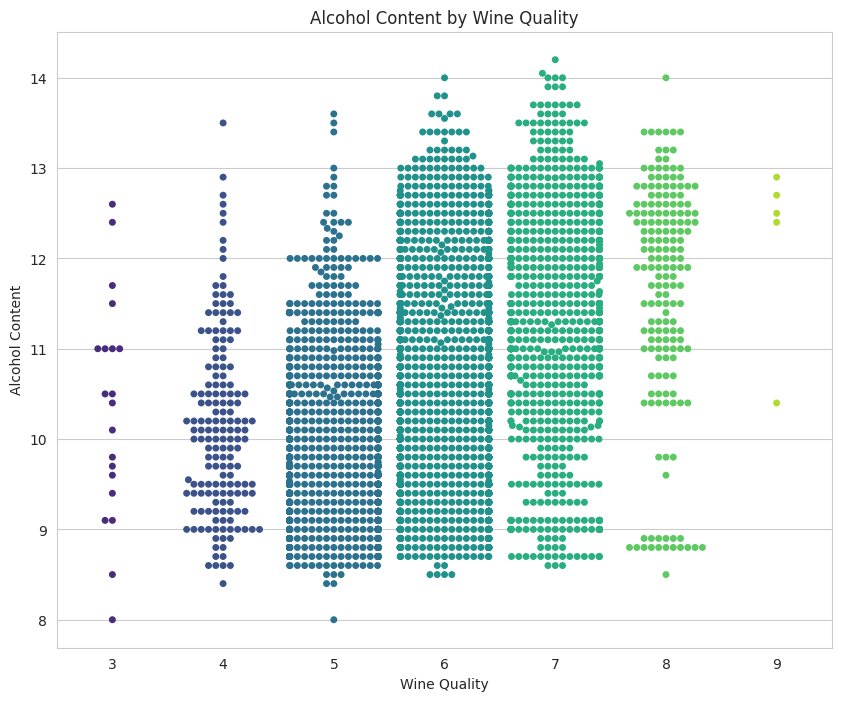

In [15]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='quality', y='alcohol', data=df,palette='viridis')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

The swarm plot above shows the distribution of alcohol content across different wine quality levels. Key observations from the plot include:

- **Higher Quality, Higher Alcohol:** There's a general trend suggesting that wines with higher quality ratings (e.g., 6, 7, 8, 9) tend to have a higher alcohol content compared to lower-rated wines (e.g., 3, 4).
- **Distribution for Middle Qualities:** Quality levels 5, 6, and 7 show a denser distribution of wines, indicating that a majority of the wines fall into these quality categories. The alcohol content for these qualities covers a broad range.
- **Sparse Data for Extreme Qualities:** Quality ratings of 3, 4, 8, and 9 have fewer data points, suggesting there are fewer wines at these extreme ends of the quality spectrum.
- **Overlap in Alcohol Content:** While there's a trend, there's also considerable overlap in alcohol content across different quality levels, especially between adjacent quality scores. This indicates that alcohol content alone isn't a definitive predictor of wine quality, but it is an important contributing factor.

<Figure size 1000x600 with 0 Axes>

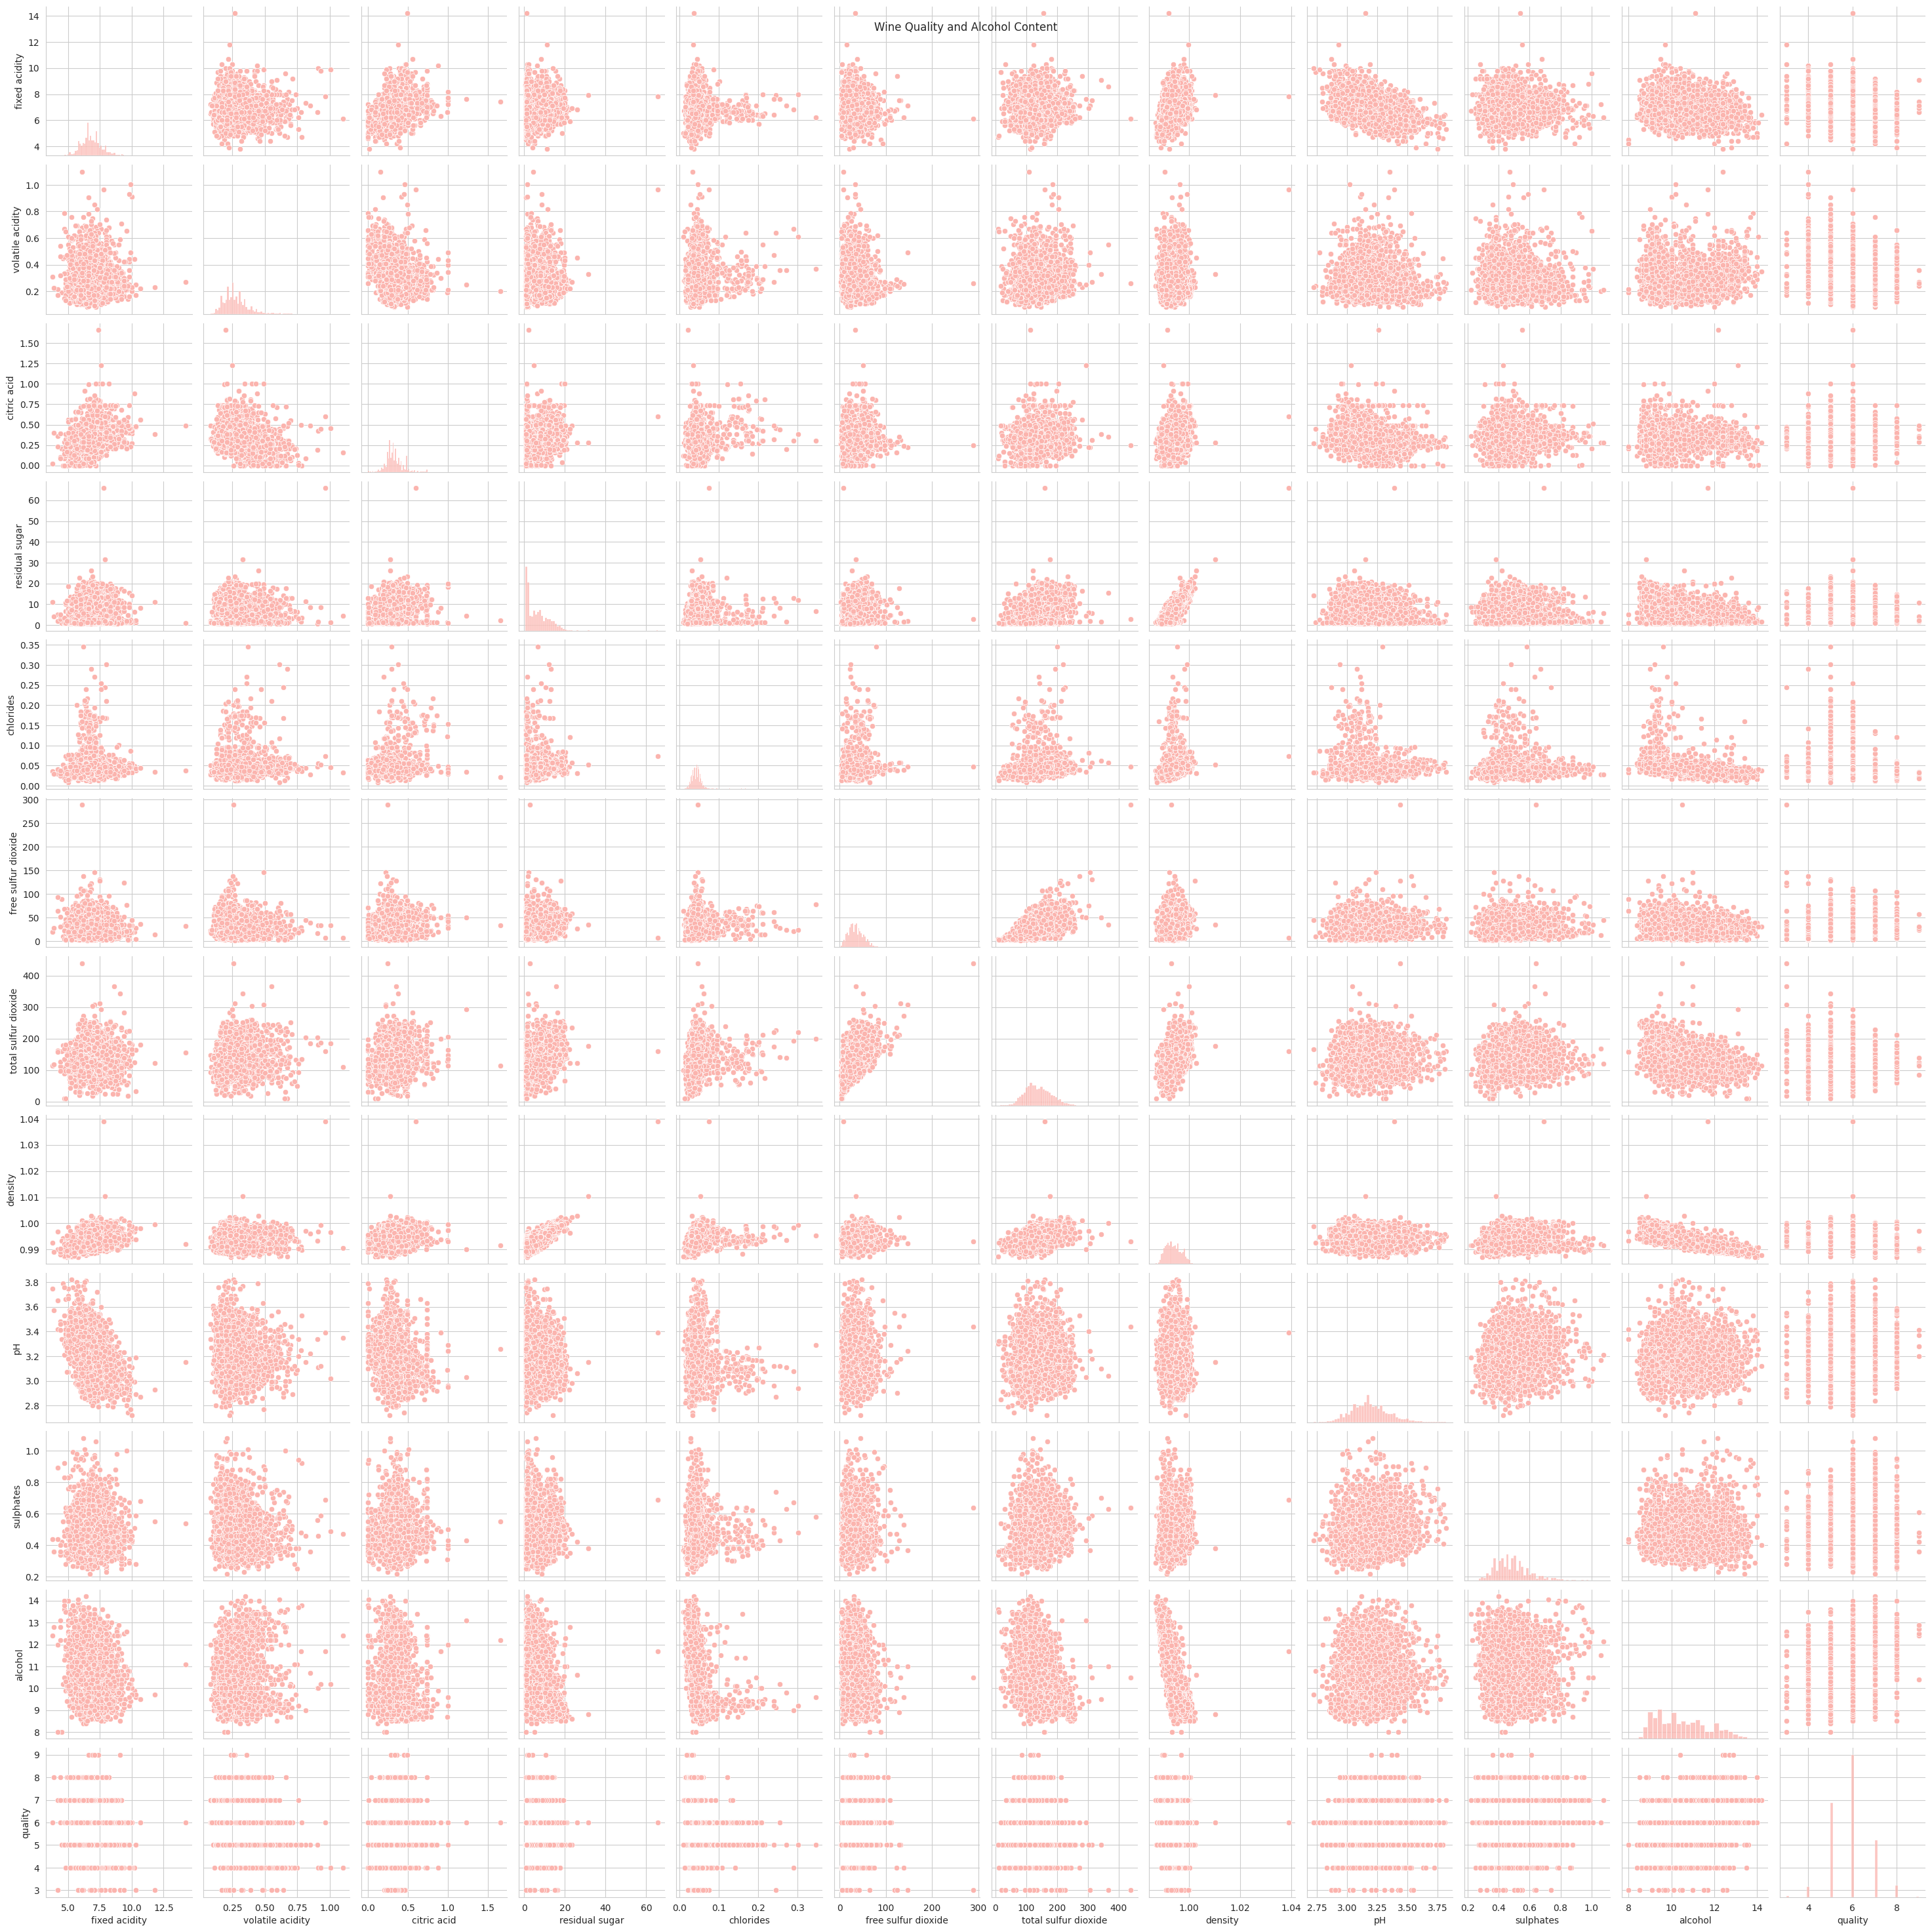

In [16]:
sns.set_palette('Pastel1')
plt.figure(figsize=(10,6))

sns.pairplot(df)
plt.suptitle('Wine Quality and Alcohol Content')
plt.show()

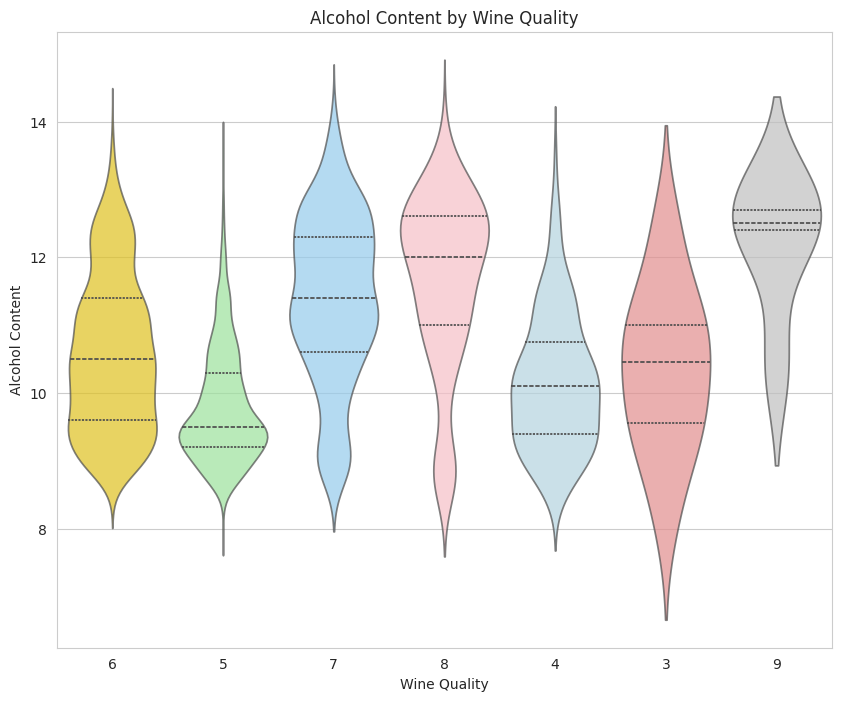

In [17]:
df['quality']= df['quality'].astype('str')
plt.figure(figsize=(10,8))
sns.violinplot(x='quality', y='alcohol', data=df,palette={'3':'lightcoral','4':'lightblue','5':'lightgreen','6':'gold','7':'lightskyblue','8':'lightpink','9':'silver'},alpha=0.7,inner='quartile')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

The pair plot (generated in cell `pAJfLgScMJLO`) provides a comprehensive overview of the relationships between all pairs of numerical variables in your dataset. Here are some notes and observations from the pair plot:

**What a Pair Plot Shows:**

A pair plot, also known as a scatterplot matrix, displays scatter plots for each pair of variables and histograms or kernel density estimates for each single variable. It's excellent for quickly visualizing relationships between variables and identifying potential correlations or distributions.

**General Observations:**

*   **Diagonal Plots (Histograms/KDEs):** The diagonal plots show the distribution of each individual feature. You can observe the skewness and modality of each feature. For instance, some features like 'free sulfur dioxide' and 'total sulfur dioxide' appear right-skewed, while 'pH' looks more normally distributed.

*   **Off-Diagonal Plots (Scatter Plots):** These plots show the relationships between each pair of variables. Key areas to observe include:
    *   **Correlations:** Look for linear patterns or trends. If points tend to go up and to the right, there's a positive correlation; if they go down and to the right, it's a negative correlation. Scattered points with no clear pattern suggest little to no linear correlation.
    *   **Clusters:** Are there distinct groups of data points?
    *   **Outliers:** Are there points far away from the main cluster of data?
    *   **Relationship with 'quality':** While 'quality' is categorical, the scatter plots against it can give some insight into how other features vary across different quality levels. For example, you might observe that higher alcohol content tends to be associated with higher quality wines, as suggested by previous plots.

**Specific Observations related to 'quality' and 'alcohol':**

*   **Alcohol vs. Quality:** The scatter plot between 'alcohol' and 'quality' (if 'quality' was treated numerically here) would reinforce the idea that higher alcohol content is generally associated with higher wine quality, although with significant overlap.

*   **Other Feature Relationships:** Examining the scatter plots for other features against 'quality' can reveal which chemical properties might have a stronger or weaker influence on the perceived quality. For instance, 'density' often shows a negative correlation with 'alcohol', and 'density' itself might have a relationship with 'quality'.

**Summary:**

The pair plot is a powerful tool for initial data exploration. It quickly highlights potential correlations, data distributions, and areas that might warrant further investigation. From these plots, you can infer that wine quality is likely influenced by a combination of factors, rather than a single dominant feature, and that several chemical properties show varying degrees of interrelationships.

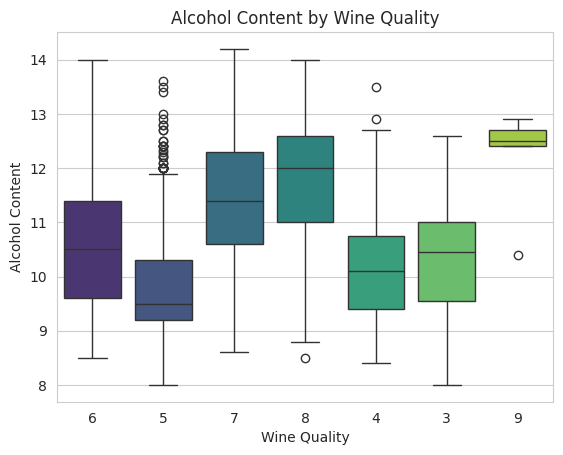

In [18]:
sns.boxplot(x='quality', y='alcohol', data=df,palette='viridis')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

The box plot (generated in cell `HchNwP0Rst_v`) displays the distribution of 'alcohol' content across different 'quality' levels. Here are the key observations:

**What a Box Plot Shows:**

A box plot (or box-and-whisker plot) graphically depicts the distribution of numerical data through their quartiles. The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data, often indicating 1.5 times the interquartile range (IQR). Outliers, if any, are plotted as individual points beyond the whiskers.

**Observations from the Plot:**

*   **Median Alcohol Content:** There's a general trend of increasing median alcohol content as wine quality increases, particularly from quality levels 5 to 8. For instance, the median alcohol for quality 8 appears higher than for quality 5.
*   **Interquartile Range (IQR):** The size of the boxes (representing the IQR) varies across different quality levels. This indicates that the spread of alcohol content is not uniform for all quality levels. Some quality levels might have a more consistent alcohol percentage, while others show a wider range.
*   **Outliers:** Several quality levels, especially the middle ones, show outliers (individual points) above or below the whiskers. These represent wines with unusually high or low alcohol content for their given quality score.
*   **Overlap:** While a trend is visible, there's significant overlap in the alcohol content ranges across adjacent quality levels. This suggests that alcohol content is a contributing factor to quality but not the sole determinant.
*   **Sparse Data for Extreme Qualities:** Quality levels 3, 4, and 9 have fewer data points, which is reflected in their potentially narrower boxes or fewer visible points, consistent with the `quality_counts` from earlier analysis.
*   **Consistency of Higher Qualities:** Wines with higher quality (e.g., 8 and 9) tend to have a higher average alcohol content and sometimes a more concentrated distribution (smaller IQR) compared to lower-quality wines, implying that a certain alcohol range might be desirable for premium wines.

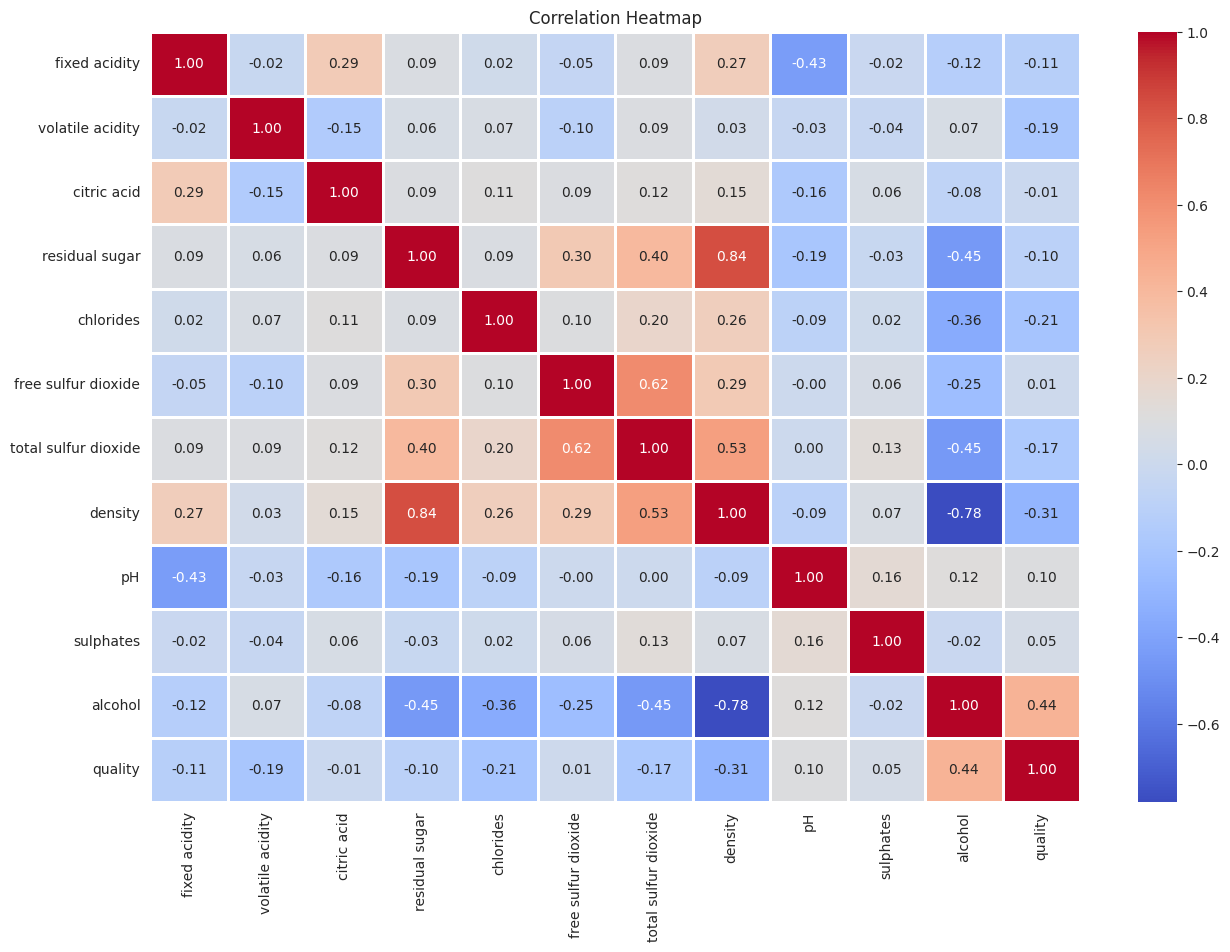

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2 )
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap (generated in cell `usQwsGlJ2Muq`) provides a visual representation of the correlation coefficients between all pairs of numerical variables in your dataset. Here's an analysis of what it reveals:

**What a Correlation Heatmap Shows:**

A correlation heatmap uses colors to represent the strength and direction of linear relationships between pairs of variables.
*   **Color Scale:** Typically, warmer colors (like red) indicate a strong positive correlation (as one variable increases, the other tends to increase), while cooler colors (like blue) indicate a strong negative correlation (as one variable increases, the other tends to decrease). Colors around the middle (like white or light shades) suggest weak or no linear correlation.
*   **Values:** The numbers displayed in each cell are the Pearson correlation coefficients, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear correlation.
*   **Diagonal:** The diagonal will always show a perfect positive correlation (+1) because each variable is perfectly correlated with itself.

**Observations from the Heatmap:**

1.  **Correlations with 'quality':**
    *   **Positive Correlations:** 'alcohol' shows a moderate positive correlation with 'quality' (around 0.44), suggesting that higher alcohol content tends to be associated with better wine quality. 'pH' and 'sulphates' also show slight positive correlations.
    *   **Negative Correlations:** 'density', 'chlorides', 'volatile acidity', and 'fixed acidity' show negative correlations with 'quality'. Among these, 'density' and 'volatile acidity' have relatively stronger negative correlations, indicating that as these values increase, wine quality tends to decrease.

2.  **Inter-feature Correlations:**
    *   **'density' and 'alcohol':** There is a strong negative correlation between 'density' and 'alcohol' (around -0.78). This is an expected relationship in wine chemistry; as alcohol content increases, the density of the wine generally decreases.
    *   **'fixed acidity' and 'citric acid':** These two also show a positive correlation.
    *   **'free sulfur dioxide' and 'total sulfur dioxide':** As expected, these two are highly positively correlated (around 0.62), as 'free sulfur dioxide' is a component of 'total sulfur dioxide'.
    *   **'residual sugar' and 'density':** There's a notable positive correlation here, suggesting that wines with higher residual sugar tend to have higher density.

3.  **Weak or No Correlations:** Many pairs of variables show weak correlations (values close to 0), meaning that their linear relationship is not very strong. For instance, 'pH' has relatively weak correlations with most other features except 'fixed acidity' (negative correlation).

**Summary:**

The heatmap provides valuable insights into which chemical properties are related to each other and, more importantly, which ones have a stronger influence (either positive or negative) on the 'quality' of the wine. It reinforces that wine quality is a complex outcome influenced by multiple factors, with alcohol content being a significant positive contributor and density/volatile acidity being significant negative contributors. The inter-correlations among features also highlight potential multicollinearity if one were to build a predictive model, which might need to be addressed.